# initial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('precision', 2)
pd.set_option('colheader_justify', 'left')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# load data

In [3]:
file_path = 'https://raw.githubusercontent.com/ThisIsMahdiZare/machineLearning_f/main/data/Absenteeism_at_work.csv'
data = pd.read_csv(file_path,delimiter=';')

In [4]:
m1 = data[data["Absenteeism time in hours"]>=60][['Age']].mean()
m2 = data[data["Absenteeism time in hours"]<60][['Age']].mean()
print('mean of group one:\n',m1,'\nmean of group two:\n',m2)

mean of group one:
 Age   40.50
dtype: float64 
mean of group two:
 Age   36.38
dtype: float64


# explore data

### get smaple

In [5]:
data.sample(n=10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
296,34,7,10,2,4,118,10,10,37,265.02,88,0,1,0,0,0,0,83,172,28,3
106,28,28,12,5,4,225,26,9,28,261.31,97,0,1,1,0,0,2,69,169,24,3
86,6,22,11,2,4,189,29,13,33,306.35,93,0,1,2,0,0,2,69,167,25,8
447,15,13,6,2,3,291,31,12,40,253.96,95,0,1,1,1,0,1,73,171,25,40
125,34,27,1,5,2,118,10,10,37,308.59,95,0,1,0,0,0,0,83,172,28,2
167,14,13,3,3,2,155,12,14,34,343.25,95,0,1,2,1,0,0,95,196,25,8
84,15,23,11,5,4,291,31,12,40,306.35,93,0,1,1,1,0,1,73,171,25,5
536,34,9,11,3,4,118,10,10,37,268.52,93,0,1,0,0,0,0,83,172,28,8
292,11,22,10,6,4,289,36,13,33,265.02,88,0,1,2,1,0,1,90,172,30,8
14,3,23,7,4,1,179,51,18,38,239.55,97,0,1,0,1,0,0,89,170,31,4


### general information

In [6]:
print("shape of data frame is:",data.shape,'\n\nfeature names:\n',data.columns.to_list())

shape of data frame is: (740, 21) 

feature names:
 ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [7]:
print("information about the data frame:\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### get unique values

In [8]:
temp = data.apply(lambda col: col.unique())
for i,v in zip(temp.index,temp):
    print('''"{}" unique values:\n{}\n'''.format(i,sorted(v)),f'lenth: {len(v)}\n')

"ID" unique values:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
 lenth: 36

"Reason for absence" unique values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
 lenth: 28

"Month of absence" unique values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 lenth: 13

"Day of the week" unique values:
[2, 3, 4, 5, 6]
 lenth: 5

"Seasons" unique values:
[1, 2, 3, 4]
 lenth: 4

"Transportation expense" unique values:
[118, 155, 157, 179, 184, 189, 225, 228, 231, 233, 235, 246, 248, 260, 268, 279, 289, 291, 300, 330, 361, 369, 378, 388]
 lenth: 24

"Distance from Residence to Work" unique values:
[5, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 25, 26, 27, 29, 31, 35, 36, 42, 45, 48, 49, 50, 51, 52]
 lenth: 25

"Service time" unique values:
[1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 29]
 lenth: 18

"Age" unique values:
[27, 28, 29, 30, 31,

In [9]:
print(data['Absenteeism time in hours'].value_counts().count())
print((data['Absenteeism time in hours'].min(),data['Absenteeism time in hours'].max()))

19
(0, 120)


In [10]:
len(data[data["Absenteeism time in hours"]>50])

14

### statistical information

In [11]:
data[data["Absenteeism time in hours"]==data["Absenteeism time in hours"].max()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
323,14,11,11,2,4,155,12,14,34,284.03,97,0,1,2,1,0,0,95,196,25,120
420,36,13,4,4,3,118,13,18,50,239.41,98,0,1,1,1,0,0,98,178,31,120
729,9,6,7,3,1,228,14,16,58,264.60,93,0,1,2,0,0,1,65,172,22,120


In [12]:
m1 = data[data["Absenteeism time in hours"]>80][['Age']].mean()
m2 = data[data["Absenteeism time in hours"]>60][['Age']].mean()
m3 = data[data["Absenteeism time in hours"]<10][['Age']].mean()
print(m1,'\n',m2,'\n',m3,'\n')
del m1,m2,m3

Age   43.50
dtype: float64 
 Age   40.50
dtype: float64 
 Age   36.42
dtype: float64 



In [13]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00
mean,18.02,19.22,6.32,3.91,2.54,221.33,29.63,12.55,36.45,271.49,94.59,0.05,1.29,1.02,0.57,0.07,0.75,79.04,172.11,26.68,6.92
std,11.02,8.43,3.44,1.42,1.11,66.95,14.84,4.38,6.48,39.06,3.78,0.23,0.67,1.10,0.50,0.26,1.32,12.88,6.03,4.29,13.33
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205.92,81.00,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244.39,93.00,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264.25,95.00,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,294.22,97.00,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378.88,100.00,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [14]:
data[data['Social smoker'].apply(lambda x: x == 1)].sort_values(by='Social drinker',ascending=False).head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
3,7,7,7,5,1,279,5,14,39,239.55,97,0,1,2,1,1,0,68,168,24,4
245,30,25,7,2,1,157,27,6,29,275.31,98,0,1,0,1,1,0,75,185,22,3
706,16,7,6,4,3,118,15,24,46,275.09,96,0,1,2,1,1,0,75,175,25,8
682,26,19,5,6,3,300,26,13,43,237.66,99,0,1,2,1,1,1,77,175,25,64
647,16,23,3,4,3,118,15,24,46,222.20,99,0,1,2,1,1,0,75,175,25,8


In [15]:
data.groupby('Absenteeism time in hours').mean()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
Absenteeism time in hours,,,,,,,,,,,,,,,,,,,,
0,18.41,0.61,7.18,3.82,3.14,243.68,26.11,12.57,39.55,276.62,92.50,0.91,1.11,1.32,0.66,0.18,1.02,83.52,171.84,28.32
1,19.05,22.36,7.24,3.92,2.72,208.31,29.64,13.43,37.57,279.36,93.88,0.00,1.27,0.74,0.55,0.05,0.73,80.60,172.06,27.20
2,20.71,24.22,5.17,4.06,2.36,198.36,27.94,12.50,35.85,266.82,95.43,0.00,1.41,0.68,0.42,0.06,0.64,76.78,172.03,25.97
3,18.79,22.11,6.13,4.21,2.75,200.62,32.93,13.01,36.00,264.50,95.13,0.00,1.28,0.79,0.54,0.04,0.67,78.82,171.17,26.96
4,16.20,23.53,7.17,4.15,2.10,230.53,33.67,12.55,36.32,261.35,93.83,0.00,1.18,1.55,0.72,0.03,0.45,78.23,171.52,26.55
5,21.43,18.57,7.43,3.86,3.00,205.43,23.14,10.71,34.14,276.28,93.14,0.00,1.57,0.71,0.43,0.00,0.57,72.14,174.43,23.57
7,10.00,25.00,8.00,2.00,1.00,361.00,52.00,3.00,28.00,205.92,92.00,0.00,1.00,1.00,1.00,0.00,4.00,80.00,172.00,27.00
8,15.69,16.79,6.45,3.76,2.47,247.76,29.92,11.96,36.06,272.64,94.78,0.00,1.30,1.24,0.60,0.10,1.00,79.56,171.94,26.88
16,15.89,16.21,5.74,3.79,2.47,224.53,26.79,11.89,34.37,290.80,94.16,0.00,1.47,1.21,0.63,0.11,0.37,76.32,173.95,25.11


In [16]:
data.groupby("Reason for absence")['Absenteeism time in hours'].describe()

,count,mean,std,min,25%,50%,75%,max
Reason for absence,,,,,,,,
0,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,16.00,11.38,14.32,1.00,8.00,8.00,8.00,64.00
2,1.00,24.00,NaN,24.00,24.00,24.00,24.00,24.00
3,1.00,8.00,NaN,8.00,8.00,8.00,8.00,8.00
4,2.00,4.50,4.95,1.00,2.75,4.50,6.25,8.00
5,3.00,6.33,2.89,3.00,5.50,8.00,8.00,8.00
6,8.00,21.38,39.89,3.00,8.00,8.00,8.00,120.00
7,15.00,10.00,10.86,1.00,3.50,8.00,8.00,40.00
8,6.00,5.33,2.94,2.00,3.00,5.50,8.00,8.00


In [17]:
pd.crosstab(data["Absenteeism time in hours"],data["Reason for absence"],margins=True)

Reason for absence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,All
Absenteeism time in hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,44
1,0,1,0,0,1,0,0,1,0,0,0,5,1,6,0,0,1,0,1,1,1,0,38,0,1,0,2,28,88
2,0,0,0,0,0,0,0,1,1,0,1,3,0,5,2,0,1,0,1,2,1,0,51,0,12,0,43,33,157
3,0,0,0,0,0,1,1,2,2,0,2,2,2,6,5,0,1,0,2,4,0,3,27,0,9,0,23,20,112
4,0,0,0,0,0,0,0,2,0,0,1,2,1,0,3,0,0,0,0,0,0,1,17,0,3,8,0,22,60
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,1,7
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8,0,12,0,1,1,2,6,5,3,1,17,10,0,21,6,2,0,1,16,19,4,33,11,3,4,24,0,6,208
16,0,1,0,0,0,0,0,0,0,1,0,2,1,4,1,0,0,0,0,4,0,1,2,0,0,1,0,1,19


In [18]:
from statistics import mode
data.pivot_table(["Reason for absence"],
               ['Absenteeism time in hours'],aggfunc=mode)

,Reason for absence
Absenteeism time in hours,
0,0
1,23
2,23
3,23
4,28
5,23
7,25
8,22
16,19


In [19]:
data.apply(mode)

ID                                  3.00
Reason for absence                 23.00
Month of absence                    3.00
Day of the week                     2.00
Seasons                             4.00
Transportation expense            179.00
Distance from Residence to Work    26.00
Service time                       18.00
Age                                28.00
Work load Average/day             222.20
Hit target                         93.00
Disciplinary failure                0.00
Education                           1.00
Son                                 0.00
Social drinker                      1.00
Social smoker                       0.00
Pet                                 0.00
Weight                             89.00
Height                            170.00
Body mass index                    31.00
Absenteeism time in hours           8.00
dtype: float64

In [20]:
pd.crosstab(data["Absenteeism time in hours"],data['Social smoker'])

Social smoker,0,1
Absenteeism time in hours,,
0,36,8
1,84,4
2,147,10
3,107,5
4,58,2
5,7,0
7,1,0
8,187,21
16,17,2


In [21]:
temp =data['Absenteeism time in hours'].apply(lambda x : 'lower than mean' if x<data['Absenteeism time in hours'].mean() else 'higher than mean')
print('mean of Absenteeism time in hours: %.2f'%data['Absenteeism time in hours'].mean())
temp.value_counts(normalize = True)

mean of Absenteeism time in hours: 6.92


lower than mean    0.63
higher than mean   0.37
Name: Absenteeism time in hours, dtype: float64

### normality test

In [22]:
from scipy.stats import normaltest
temp = data.apply(lambda col: col.unique())
gaus_list =[]
nonGaus_list=[]

for i,v in zip(temp.index,temp):
    try:
        stat, p = normaltest(v)
        border = 0.01
        if p > border:
            gaus_list.append(i)
        else:
            nonGaus_list.append(i)
    except ValueError:
        nonGaus_list.append(i)
print('number of all columns:',len(data.columns))
print('features that follow gaussian distribution:\n{0}\nNumber: {1}'.format(gaus_list,len(gaus_list)))
print('''\nfeatures that don't follow gaussian distribution:\n{0}\nNumber: {1}'''.format(nonGaus_list,len(nonGaus_list)))                     

number of all columns: 21
features that follow gaussian distribution:
['ID', 'Reason for absence', 'Month of absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
Number: 13

features that don't follow gaussian distribution:
['Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
Number: 8


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  w

# visualize data

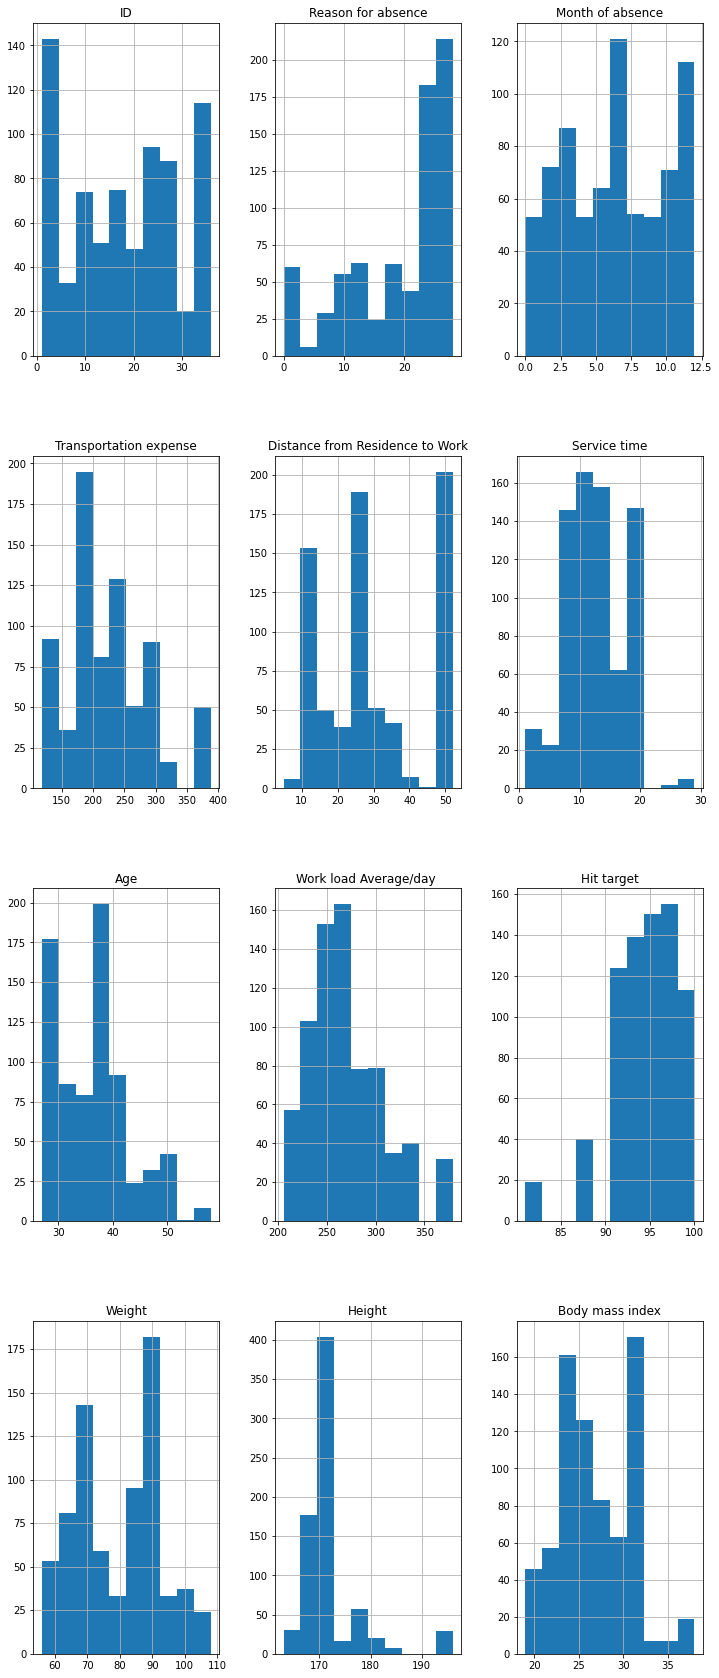

In [23]:
fig, axes = plt.subplots(len(gaus_list)//3, 3, figsize=(12, 30))
i = 0
for ax in axes:
    for axis in ax:
            data.hist(column = gaus_list[i], ax=axis)
            i = i+1

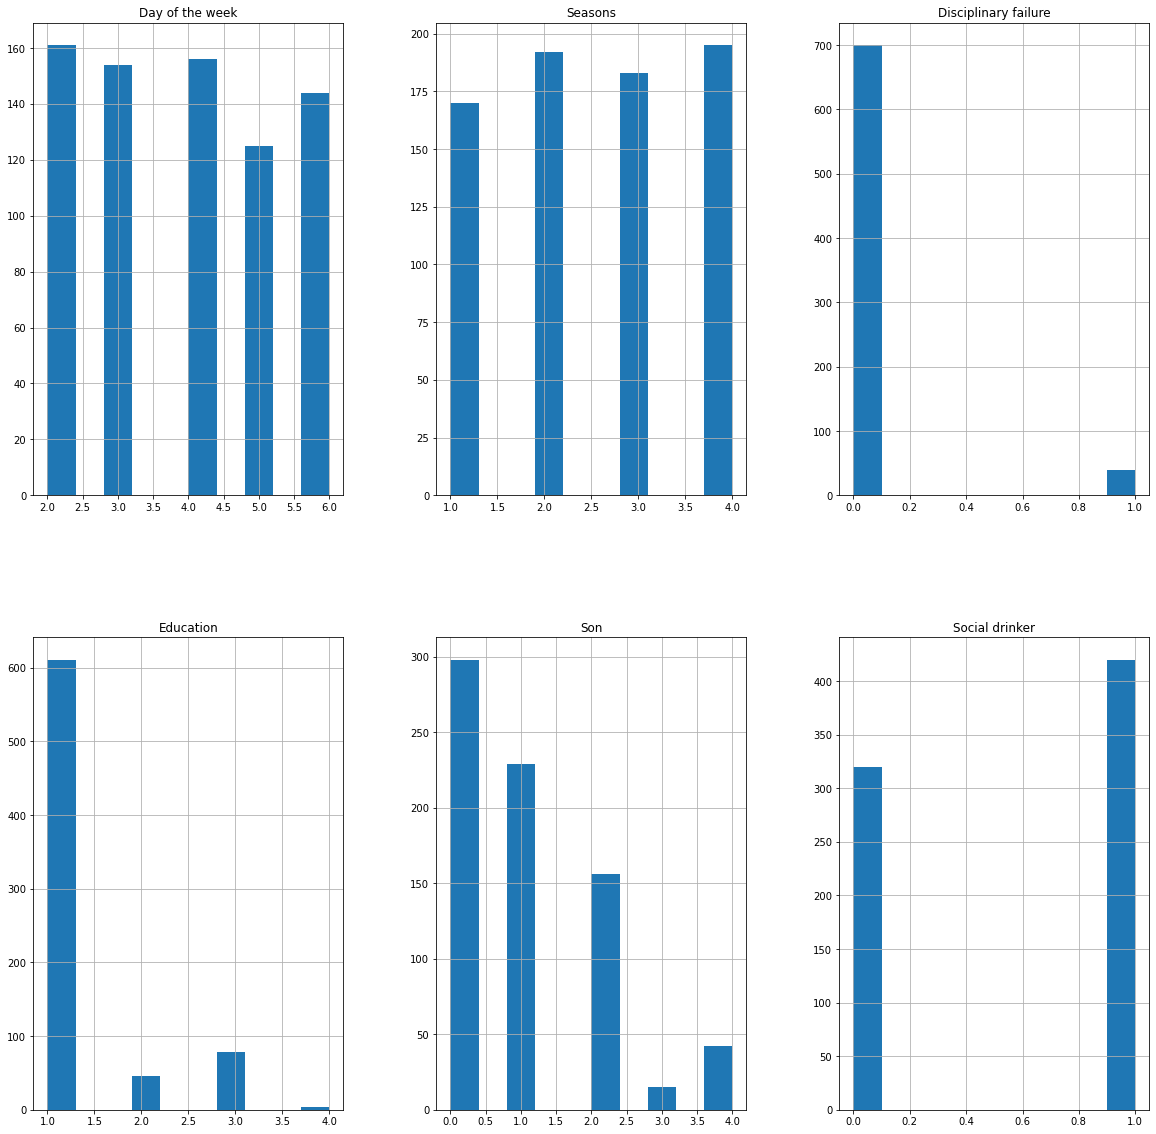

In [24]:
fig, axes = plt.subplots(len(nonGaus_list)//3, 3, figsize=(20, 20))
i = 0
for ax in axes:
    for axis in ax:
            data.hist(column = nonGaus_list[i], ax=axis)
            i = i+1

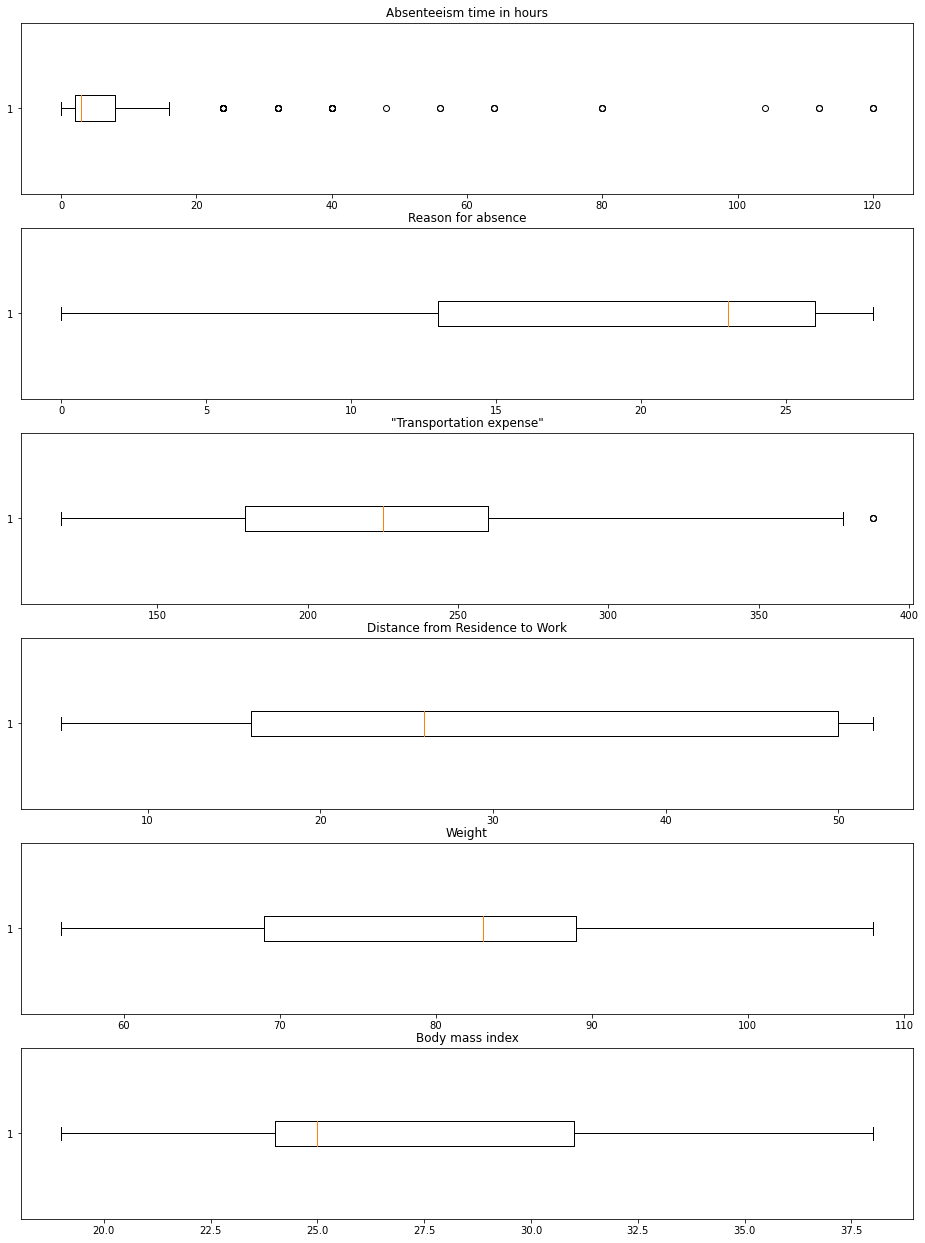

In [25]:
fig = plt.figure(figsize=(16,22))
plt.subplot(6,1,1)
plt.boxplot(data['Absenteeism time in hours'],vert=False);
plt.title('Absenteeism time in hours');
plt.subplot(6,1,2)
plt.boxplot(data['Reason for absence'],vert=False);
plt.title('Reason for absence');
plt.subplot(6,1,3)
plt.boxplot(data["Transportation expense"],vert=False);
plt.title('"Transportation expense"');
plt.subplot(6,1,4)
plt.boxplot(data["Distance from Residence to Work"],vert=False);
plt.title("Distance from Residence to Work");
plt.subplot(6,1,5)
plt.boxplot(data["Weight"],vert=False);
plt.title("Weight");
plt.subplot(6,1,6)
plt.boxplot(data["Body mass index"],vert=False);
plt.title("Body mass index");

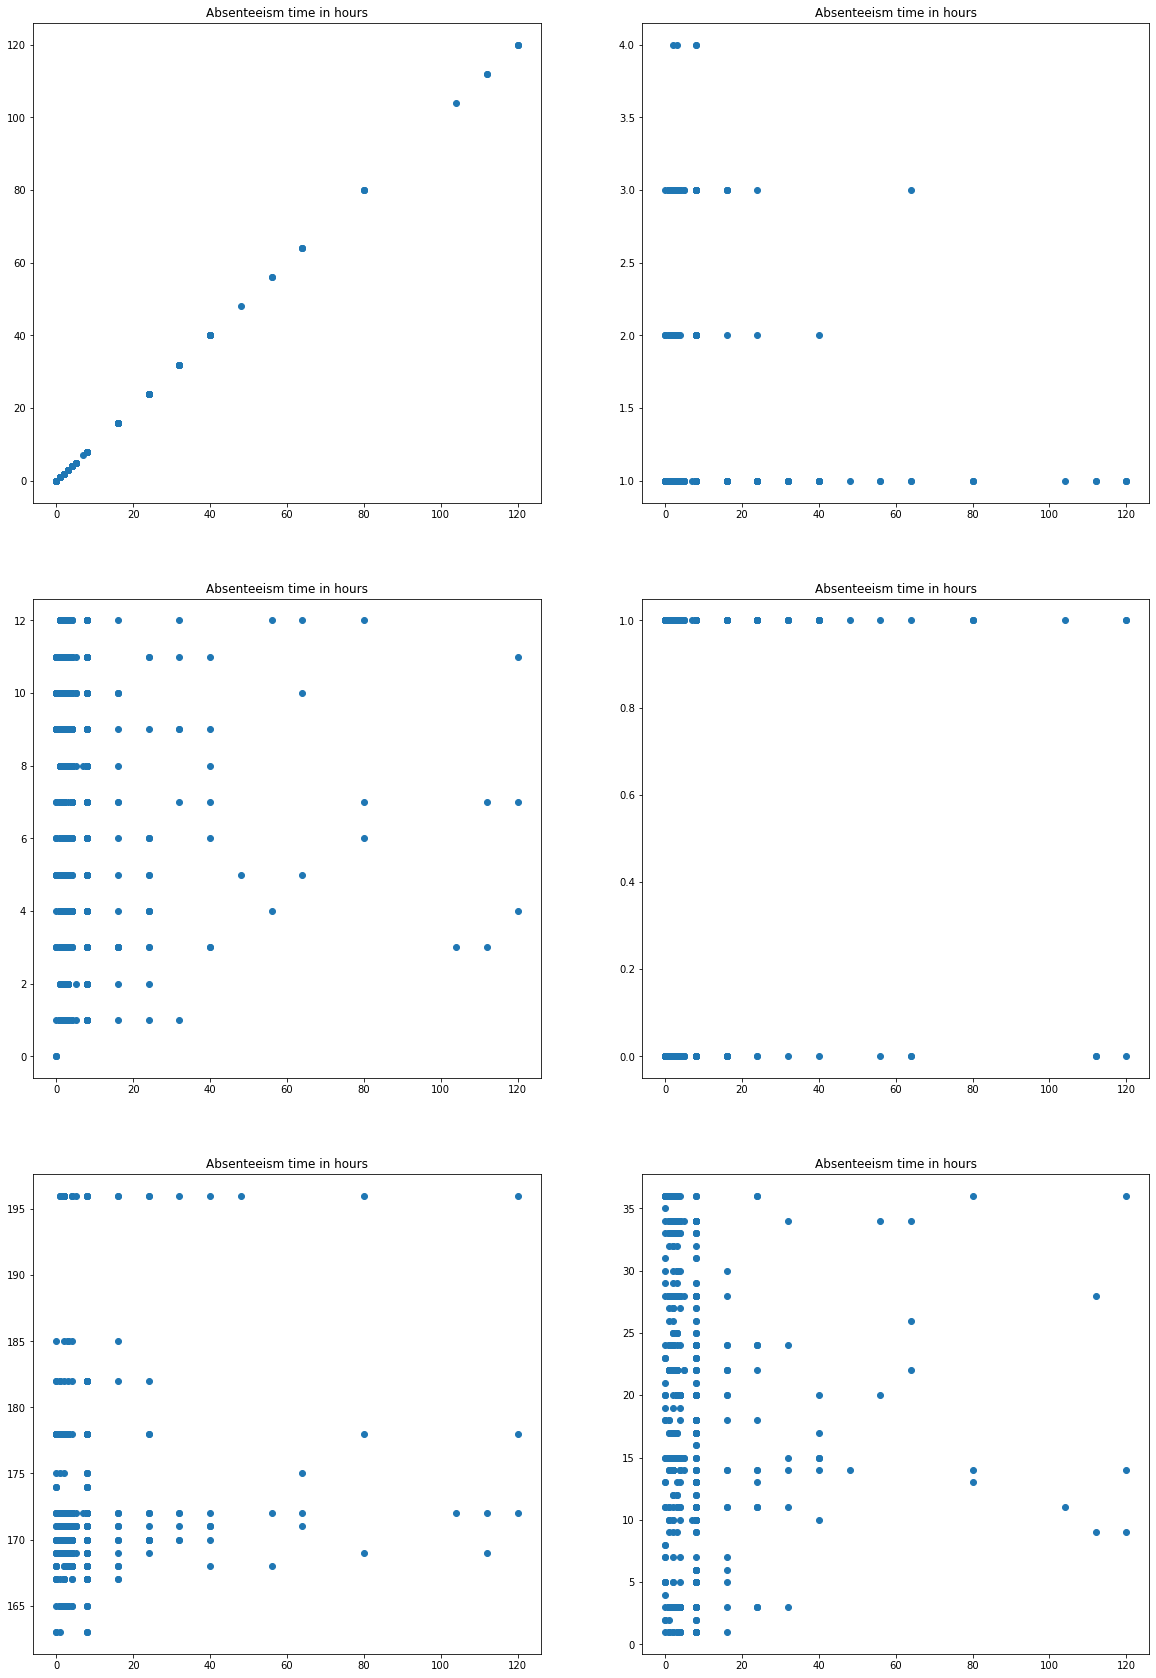

In [26]:
sample_cols = np.random.choice(np.array(data.columns),size=8,replace =False)
target_col = 'Absenteeism time in hours'
fig1,ax = plt.subplots(3, 2,figsize=(20,30))

ax[0, 0].scatter(data[target_col],data[sample_cols[0]]);
ax[0, 0].set_title(sample_cols[0])
ax[0, 1].scatter(data[target_col],data[sample_cols[1]]);
ax[0, 1].set_title(sample_cols[0]);
ax[1, 0].scatter(data[target_col],data[sample_cols[2]]);
ax[1, 0].set_title(sample_cols[0]);
ax[1, 1].scatter(data[target_col],data[sample_cols[3]]);
ax[1, 1].set_title(sample_cols[0]);
ax[2, 0].scatter(data[target_col],data[sample_cols[4]]);
ax[2, 0].set_title(sample_cols[0]);
ax[2, 1].scatter(data[target_col],data[sample_cols[5]]);
ax[2, 1].set_title(sample_cols[0]);

# pre processing

## remove useless data

### useless features

In [27]:
print('shape of data before starting anything:',data.shape)

shape of data before starting anything: (740, 21)


In [28]:
no_absent = data[data["Absenteeism time in hours"]==0]
all_absent = data[data["Absenteeism time in hours"]!=0]

In [29]:
print('all non absent:',len(no_absent))
for column in no_absent.columns:
    print(column)
    print(no_absent[column].value_counts(),'\n\n\n')

all non absent: 44
ID
36    6
5     5
23    3
20    3
8     2
11    2
13    2
15    2
18    2
2     2
7     2
4     1
30    1
35    1
34    1
33    1
31    1
3     1
29    1
28    1
24    1
21    1
19    1
1     1
Name: ID, dtype: int64 



Reason for absence
0     43
27     1
Name: Reason for absence, dtype: int64 



Month of absence
9     9
10    9
5     6
11    6
3     4
0     3
6     3
7     2
1     1
4     1
Name: Month of absence, dtype: int64 



Day of the week
3    13
4    11
2     7
5     7
6     6
Name: Day of the week, dtype: int64 



Seasons
4    21
3    14
1     6
2     3
Name: Seasons, dtype: int64 



Transportation expense
118    8
235    8
378    3
291    3
260    3
330    2
369    2
179    2
225    2
279    2
289    2
231    2
388    1
157    1
268    1
246    1
248    1
Name: Transportation expense, dtype: int64 



Distance from Residence to Work
13    6
20    5
50    4
49    3
5     2
29    2
36    2
35    2
31    2
26    2
25    2
17    2
16    2
11    2
10    

In [30]:
no_absent_to_analyise = no_absent[['Reason for absence','Disciplinary failure']]
all_absent_to_analyise = all_absent[['Reason for absence','Disciplinary failure']]

print('showing value counts in non absent dataset:\n')
for column in no_absent_to_analyise.columns:
    print(column)
    print(no_absent_to_analyise[column].value_counts(),'\n\n\n')
    
print('showing value counts in all absent dataset:\n')
for column in all_absent_to_analyise.columns:
    print(column)
    print(all_absent_to_analyise[column].value_counts(),'\n\n\n')

showing value counts in non absent dataset:

Reason for absence
0     43
27     1
Name: Reason for absence, dtype: int64 



Disciplinary failure
1    40
0     4
Name: Disciplinary failure, dtype: int64 



showing value counts in all absent dataset:

Reason for absence
23    149
28    112
27     68
13     55
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
12      8
6       8
8       6
21      6
9       4
16      3
24      3
5       3
15      2
4       2
2       1
17      1
3       1
Name: Reason for absence, dtype: int64 



Disciplinary failure
0    696
Name: Disciplinary failure, dtype: int64 





In [31]:
data = all_absent.drop(['Disciplinary failure'],axis=1)

In [32]:
print('shape of data after removing useless data:',data.shape)

shape of data after removing useless data: (696, 20)


### outliers

In [33]:
target = 'Absenteeism time in hours'
high = data[target].quantile(.96)
outliers = data[target][(data[target] > high)]
data = data[(data[target] <= high)]
print('''"Absenteeism time in hours" outliers :\n''',outliers.sort_values(),'\nNumber:',len(outliers))

"Absenteeism time in hours" outliers :
 555     32
49      32
85      32
359     32
279     32
249     32
8       40
447     40
287     40
87      40
163     40
22      40
164     40
692     48
197     56
104     56
99      64
682     64
299     64
569     80
231     80
734     80
652    104
471    112
622    112
323    120
420    120
729    120
Name: Absenteeism time in hours, dtype: int64 
Number: 28


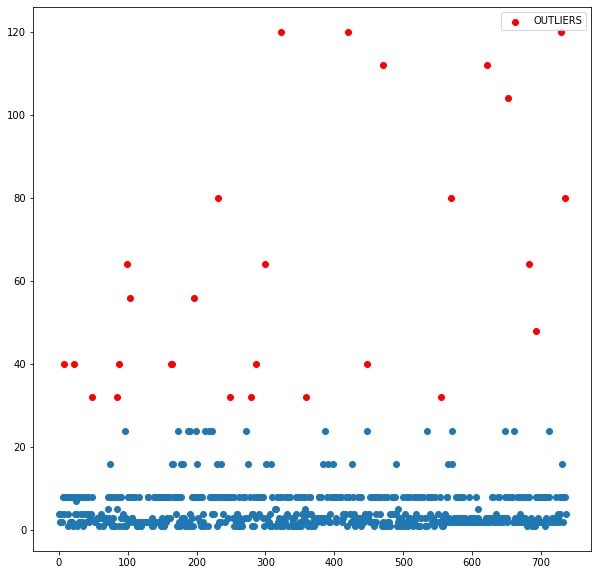

In [34]:
fig = plt.figure(figsize=(10,10))
plt.scatter(data.index,data['Absenteeism time in hours'])
plt.scatter(outliers.index,outliers,color='red',label='OUTLIERS')
plt.legend()
plt.show()

In [35]:
print('shape of data after removing outliers:',data.shape)

shape of data after removing outliers: (668, 20)


## binning

### age

In [36]:
data['Age'].min(),data['Age'].max()

(27, 58)

In [37]:
bins = [20,30,40,50,60]
names = ['20-29', '30-39', '40-49','50-59']        
data['Age'] = pd.cut(data['Age'],bins,labels=names)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Age'] = encoder.fit_transform(data['Age'])

In [39]:
data['Age'].value_counts().sort_index()

0    169
1    381
2    112
3      6
Name: Age, dtype: int64

### Absenteeism time in hours

In [40]:
data['Absenteeism time in hours'].value_counts().sort_index()

1      88
2     157
3     112
4      60
5       7
7       1
8     208
16     19
24     16
Name: Absenteeism time in hours, dtype: int64

In [41]:
bins = [0,5,10,20,25]
labels = ['Grade1','Grade2','Grade3','Grade4']

In [42]:
data['Absenteeism time in hours'] = pd.cut(data['Absenteeism time in hours'],bins, labels=labels)

In [43]:
data['Absenteeism time in hours'].value_counts().sort_index()

Grade1    424
Grade2    209
Grade3     19
Grade4     16
Name: Absenteeism time in hours, dtype: int64

In [44]:
data['Absenteeism time in hours'] = encoder.fit_transform(data['Absenteeism time in hours'])

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

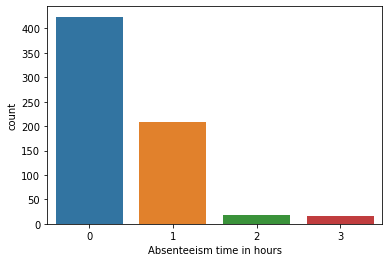

In [45]:
sns.countplot(x=data['Absenteeism time in hours'])

## dummy variables

In [46]:
cols = ['Reason for absence', 'Seasons', 'Day of the week',
        'Month of absence','Education','Son','Pet']
data = pd.get_dummies(data,columns=cols)

cols = data.columns.to_list()
idx = cols.index('Absenteeism time in hours')
cols = cols[:idx] + cols[idx+1:] + ['Absenteeism time in hours']
data = data[cols]
x,y = data.values[:,:-1] , data.values[:,-1]
data.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Social drinker', 'Social smoker', 'Weight', 'Height',
       'Body mass index', 'Reason for absence_1', 'Reason for absence_2',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_5',
       'Reason for absence_6', 'Reason for absence_7', 'Reason for absence_8',
       'Reason for absence_9', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_15', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_21',
       'Reason for absence_22', 'Reason for absence_23',
       'Reason for absence_24', 'Reason for absence_25',
       'Reason for absence_26', 'Reason for absence_27',
       'Reason for absence_28', 'Seasons_1', 'Seas

In [47]:
## train-test split

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data.values[:,:-1], data.values[:,-1],test_size=.27)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(487, 75) (487,) (181, 75) (181,)


## over sampling

In [49]:
#pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='count'>

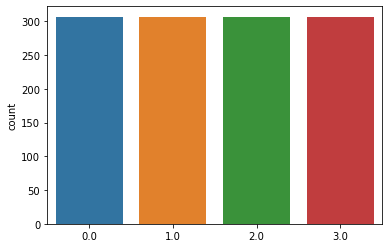

In [51]:
sns.countplot(x=y_train)

In [52]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1228, 75) (1228,) (181, 75) (181,)


## feature selection

In [53]:
print(data.corr().iloc[:,-1].sort_values().head(20))
print('\n\n')
print(data.corr().iloc[:,-1].sort_values().tail(20))

Reason for absence_23             -0.27
Reason for absence_28             -0.23
Reason for absence_27             -0.22
ID                                -0.13
Pet_2                             -0.11
Day of the week_6                 -0.10
Reason for absence_25             -0.09
Son_1                             -0.09
Son_0                             -0.08
Month of absence_2                -0.08
Month of absence_1                -0.06
Seasons_2                         -0.06
Month of absence_12               -0.05
Seasons_4                         -0.05
Reason for absence_16             -0.04
Education_3                       -0.04
Day of the week_5                 -0.04
Month of absence_9                -0.04
Distance from Residence to Work   -0.04
Hit target                        -0.04
Name: Absenteeism time in hours, dtype: float64



Reason for absence_9        0.09
Height                      0.09
Age                         0.09
Reason for absence_18       0.09
Pet_4            

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

selector = SelectKBest(k=30)
sel = selector.fit(x_train,y_train)

x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [13 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [55]:
l = data.columns[:-1]
s =sel.get_support()
l[s]

Index(['Service time', 'Work load Average/day ', 'Social drinker',
       'Reason for absence_7', 'Reason for absence_9', 'Reason for absence_10',
       'Reason for absence_12', 'Reason for absence_13',
       'Reason for absence_18', 'Reason for absence_19',
       'Reason for absence_22', 'Reason for absence_23',
       'Reason for absence_26', 'Reason for absence_27',
       'Reason for absence_28', 'Seasons_1', 'Seasons_3', 'Seasons_4',
       'Day of the week_4', 'Day of the week_5', 'Day of the week_6',
       'Month of absence_3', 'Month of absence_4', 'Month of absence_6',
       'Month of absence_7', 'Month of absence_10', 'Education_2', 'Son_1',
       'Pet_2', 'Pet_4'],
      dtype='object')

# fit

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error,accuracy_score   

In [57]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(
) ,SVC(), RandomForestClassifier(),MLPClassifier(),GaussianNB()]

In [58]:
def score_modeling(models,show_result = None):
    for clf in models:
        clf.fit(x_train, y_train)
        p = clf.predict(x_test)
        print(f'report for {clf}:')
        print('mean absolute error:', mean_absolute_error(p, y_test),
            '\naccuracy score:', accuracy_score(y_test, p),'\n\n')
    return pd.DataFrame([p,y_test])

In [59]:
manu_test = score_modeling(models)

report for KNeighborsClassifier():
mean absolute error: 0.430939226519337 
accuracy score: 0.6464088397790055 


report for DecisionTreeClassifier():
mean absolute error: 0.35911602209944754 
accuracy score: 0.712707182320442 


report for SVC():
mean absolute error: 0.425414364640884 
accuracy score: 0.6464088397790055 


report for RandomForestClassifier():
mean absolute error: 0.2596685082872928 
accuracy score: 0.7845303867403315 


report for MLPClassifier():
mean absolute error: 0.425414364640884 
accuracy score: 0.6464088397790055 


report for GaussianNB():
mean absolute error: 1.0662983425414365 
accuracy score: 0.3370165745856354 




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
manu_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
0,1.00,3.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,3.00,1.00,1.00,3.00,1.00,3.00,1.00,1.00,3.00,3.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,3.00,3.00,3.00,1.00,1.00,1.00,...,1.00,1.00,3.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,1.00,1.00,1.00,3.00,3.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,3.00,1.00,3.00,3.00,1.00,1.00,1.00,0.00,3.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,2.00,0.00,3.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,1.00,1.00
